In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

데이터 분석을 위해서 데이터를 불러온다. => 불러온 데이터를 데이터 집합(set)이라고 한다.

In [2]:
# read_csv() 함수로 데이터 집합을 불러와서 데이터프레임으로 리턴한다.
# read_csv() 함수는 ','로 구분된 데이터를 불러오기 때문에 탭으로 구분된 갭마인더 데이터는 sep='\t' 옵션을 사용해서 불러온다.
gapminder_df = pd.read_csv('./data/gapminder.tsv', sep='\t')
print(type(gapminder_df)) # <class 'pandas.core.frame.DataFrame'>
gapminder_df

<class 'pandas.core.frame.DataFrame'>


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [3]:
# head() 함수는 데이터프레임 앞쪽 데이터를 지정한 인수 개만큼 출력한다. 기본값은 5
gapminder_df.head(3)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710


In [4]:
# tail() 함수는 데이터프레임 뒤쪽 데이터를 지정한 인수 개만큼 출력한다. 기본값은 5
gapminder_df.tail(3)

,country,continent,year,lifeExp,pop,gdpPercap
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [5]:
# shape 속성은 데이터프레임에 저장된 데이터의 행과 열의 크기 정보를 저장하고 있다.
print(gapminder_df.shape)
print(gapminder_df.shape[0]) # shape[0]은 데이터프레임의 행의 개수
print(gapminder_df.shape[1]) # shape[1]은 데이터프레임의 열의 개수
# columns 속성은 데이터프레임의 열 이름을 저장하고 있다.
print(gapminder_df.columns)
# country: 국가, continent: 대륙, year: 년도, lifeExp: 평균수명, pop: 인구수, gdpPercap: 1인당 gdp

(1704, 6)
1704
6
Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


In [6]:
# dtypes 속성은 데이터프레임을 구성하고 있는 데이터의 자료형을 확인할 수 있다. object => 문자열
print(gapminder_df.dtypes)

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object


In [7]:
# info() 함수를 사용하면 dtypes를 사용한 것 보다 좀 더 자세한 내용을 확인할 수 있다.
print(gapminder_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


열 단위 데이터 추출하기

In [8]:
# 데이터프레임에서 추출하려면 대괄호와 열 이름을 사용하며 추출한 열은 변수에 저장해서 사용한다.
# 1개의 열만 추출하면 시리즈를 얻을 수 있다.
# country_df = gapminder_df['country'] # 데이터프레임에서 1개의 열만 얻어오려면 열 이름만 사용하면 된다.
# get() 메소의 인수로 열 이름을 지정하면 1개의 열을 얻어올 수 있다.
# country_df = gapminder_df.get('country')
country_df = gapminder_df.country # 1개의 열만 얻어올 경우 데이터프레임 이름 뒤에 '.'을 찍고 열 이름을 적어주면 된다.
print(type(country_df)) # <class 'pandas.core.series.Series'>
print(country_df.head(3))
print(country_df.tail(3))

<class 'pandas.core.series.Series'>
0    Afghanistan
1    Afghanistan
2    Afghanistan
Name: country, dtype: object
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


In [9]:
# 2개 이상의 열을 추출하면 데이터프레임을 얻을 수 있다.
# 데이터프레임에서 1개의 열만 얻어오려면 [] 안에 또는 get() 함수의 인수로 열 이름만 적어주면 되지만 2개 이상의 열을 얻어오려면
# [] 또는 get() 함수의 인수로 반드시 리스트 형태로 열 이름을 적어줘야 한다.
subset_df = gapminder_df[['country', 'continent', 'year']]
# subset_df = gapminder_df.get(['country', 'continent', 'year'])
# subset_df = gapminder_df.['country', 'continent', 'year'] # 에러, 1개의 열만 얻어올 때 사용해야 한다.
print(type(subset_df)) # <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>


In [14]:
subset_df.head(3)

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962


In [15]:
subset_df.tail(3)

,country,continent,year
1701,Zimbabwe,Africa,1997
1702,Zimbabwe,Africa,2002
1703,Zimbabwe,Africa,2007


행 단위 데이터 추출하기  
loc는 인덱스를 기준으로 행 단위 데이터를 추출하고 iloc는 행 번호를 기준으로 행 단위 데이터를 추출한다.

In [21]:
# 데이터프레임을 출력했을 때 맨 왼쪽(컬럼 이름이 없는)에 보이는 숫자가 인덱스를 의미하고 행 번호는 데이터의 순서를 의미한다.
gapminder_df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [27]:
# loc를 사용하면 0 ~ 1703 사이의 값을 이용해서 행 단위 데이터를 추출할 수 있고 인덱스가 아닌 -1 이나 1704와 같이 인덱스 범위를
# 벗어나는 인덱스를 지정하면 에러가 발생된다.
print(gapminder_df.loc[0])
print('=' * 80)
print(gapminder_df.loc[1703])
print('=' * 80)
# print(gapminder_df.loc[-1]) # 인덱스 범위를 벗어나므로 에러가 발생된다.
# print(gapminder_df.loc[1704]) # 인덱스 범위를 벗어나므로 에러가 발생된다.

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [31]:
# 마지막 데이터 추출하기 => tail() 함수 사용
print(gapminder_df.tail(1))
gapminder_df_last = gapminder_df.tail(1)
print(gapminder_df_last)

       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298
       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


In [37]:
# 마지막 데이터 추출하기 => shape 사용
print(gapminder_df.shape)
print(gapminder_df.shape[0])
print(gapminder_df.loc[gapminder_df.shape[0] - 1])

(1704, 6)
1704
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [42]:
# 여러 인덱스의 데이터를 한꺼번에 추출하려면 리스트에 추출하려는 데이터의 인덱스를 담아서 loc에 넘겨주면 된다.
print(gapminder_df.loc[[0, 99, 999, 1703]])

          country continent  year  lifeExp       pop    gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333   779.445314
99     Bangladesh      Asia  1967   43.453  62821884   721.186086
999      Mongolia      Asia  1967   51.253   1149500  1226.041130
1703     Zimbabwe    Africa  2007   43.487  12311143   469.709298


In [47]:
# iloc를 사용하면 0 ~ 1703 사이의 값을 이용해 행 단위 데이터를 추출할 수 있고 1704와 같이 범위를 벗어나는 행 번호를 사용하면
# 에러가 발생된다.
# 음수를 지정하면 뒤 부터 역순으로 행 단위의 데이터를 추출할 수 있다.
print(gapminder_df.iloc[0])
print('=' * 80)
print(gapminder_df.iloc[1703])
print('=' * 80)
print(gapminder_df.iloc[-1])
print('=' * 80)
# print(gapminder_df.iloc[1704]) # 행번호 범위를 벗어나므로 에러가 발생된다.

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object
country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [48]:
# 여러 인덱스의 데이터를 한꺼번에 추출하려면 리스트에 추출하려는 데이터의 인덱스를 담아서 loc에 넘겨주면 된다.
print(gapminder_df.iloc[[0, 99, 999, 1703]])

          country continent  year  lifeExp       pop    gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333   779.445314
99     Bangladesh      Asia  1967   43.453  62821884   721.186086
999      Mongolia      Asia  1967   51.253   1149500  1226.041130
1703     Zimbabwe    Africa  2007   43.487  12311143   469.709298


loc와 iloc를 자유자재로 사용하려면 추출할 데이터의 행과 열을 지정하는 방법을 알아야 한다.  
데이터프레임.loc[[행], [열]], 데이터프레임.iloc[[행], [열]] 방법을 사용해야 하며 슬라이싱이나 range() 함수를 사용하는 방법을 알아야 한다.

슬라이싱

In [58]:
# 모든 행(':')의 데이터에 대해 country, year, pop 열을 추출한다.
subset = gapminder_df.loc[:, ['country', 'year', 'pop']]
subset.head()

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [59]:
# loc는 열을 추출할 때 열 이름에 정수 리스트를 전달하면 에러가 발생된다.
# subset = gapminder_df.loc[:, [0, 2, 4]] # 에러

In [60]:
subset = gapminder_df.iloc[:, [0, 2, 4]]
subset.head()

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [61]:
# iloc는 열을 추출할 때 열 이름에 문자열 리스트를 전달하면 에러가 발생된다.
# subset = gapminder_df.iloc[:, ['country', 'year', 'pop']] # 에러

range() 함수는 초기치 부터 최종치를 넘어가지 않을 때 까지 증가치 만큼 증가하는 숫자 리스트를 만든다.  
range([초기치, ]최종치[, 증가치])  
초기치가 생략되면 0이 기본값으로 증가치가 생략되면 1이 기본값으로 사용된다.  
range(10)와 range(0, 10)와 range(0, 10, 1)는 같은 표현이다. => 실행 결과 숫자 리스트는 list()를 사용해서 리스트로 만들어야 확인할 수 있다.

In [64]:
print(range(10))
print(list(range(10)))
print(list(range(0, 10)))
print(list(range(0, 10, 1)))

range(0, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [69]:
subset = gapminder_df.iloc[:, range(5)]
subset.head()

,country,continent,year,lifeExp,pop
0,Afghanistan,Asia,1952,28.801,8425333
1,Afghanistan,Asia,1957,30.332,9240934
2,Afghanistan,Asia,1962,31.997,10267083
3,Afghanistan,Asia,1967,34.020,11537966
4,Afghanistan,Asia,1972,36.088,13079460


In [70]:
subset = gapminder_df.iloc[:, range(3, 6)]
subset.head()

,lifeExp,pop,gdpPercap
0,28.801,8425333,779.445314
1,30.332,9240934,820.853030
2,31.997,10267083,853.100710
3,34.020,11537966,836.197138
4,36.088,13079460,739.981106


In [71]:
subset = gapminder_df.iloc[:, range(0, 6, 2)]
subset.head()

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


range() 함수보다 슬라이싱을 사용하면 더 간편하게 사용할 수 있다.

In [73]:
# subset = gapminder_df.iloc[:, range(3, 6)]
subset = gapminder_df.iloc[:, 3:]
subset.head()

,lifeExp,pop,gdpPercap
0,28.801,8425333,779.445314
1,30.332,9240934,820.853030
2,31.997,10267083,853.100710
3,34.020,11537966,836.197138
4,36.088,13079460,739.981106


In [75]:
# subset = gapminder_df.iloc[:, range(0, 6, 2)]
# [시작:끝] => [:], [시작:끝:증가] => [::]
subset = gapminder_df.iloc[:, ::2]
subset.head()

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


iloc로 열 리스트를 정수로 전달하는 방법이 간편해 보일 수 있지만 이렇게 작성한 코드는 나중에 어떤 데이터를 추출하기 위한 코드인지 파악하지 못할 수 있다.  
그래서 보통 loc로 열 리스트로 열 이름을 전달하는 방법을 많이 사용한다.

In [77]:
gapminder_df.iloc[:, [0, 3, 5]].head()

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
1,Afghanistan,30.332,820.853030
2,Afghanistan,31.997,853.100710
3,Afghanistan,34.020,836.197138
4,Afghanistan,36.088,739.981106


In [78]:
gapminder_df.loc[:, ['country', 'lifeExp', 'gdpPercap']].head()

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
1,Afghanistan,30.332,820.853030
2,Afghanistan,31.997,853.100710
3,Afghanistan,34.020,836.197138
4,Afghanistan,36.088,739.981106


기초적인 통계 계산하기

In [82]:
# groupby() 함수를 사용해 year 열로 그룹화하고 평균 수명 열(lifeExp)만 추출한 후 평균(mean()) 함수를 사용해 평균을 계산한다.
print(gapminder_df.groupby('year')) # 그룹화
print(gapminder_df.groupby('year')['lifeExp']) # 그룹화된 데이터프레임에서 시리즈 추출
print(gapminder_df.groupby('year')['lifeExp'].mean())

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [87]:
print(gapminder_df.groupby(['continent', 'year'])['lifeExp'].mean())

continent  year
Africa     1952    39.135500
           1957    41.266346
           1962    43.319442
           1967    45.334538
           1972    47.450942
           1977    49.580423
           1982    51.592865
           1987    53.344788
           1992    53.629577
           1997    53.598269
           2002    53.325231
           2007    54.806038
Americas   1952    53.279840
           1957    55.960280
           1962    58.398760
           1967    60.410920
           1972    62.394920
           1977    64.391560
           1982    66.228840
           1987    68.090720
           1992    69.568360
           1997    71.150480
           2002    72.422040
           2007    73.608120
Asia       1952    46.314394
           1957    49.318544
           1962    51.563223
           1967    54.663640
           1972    57.319269
           1977    59.610556
           1982    62.617939
           1987    64.851182
           1992    66.537212
           1997    68.02051

그래프 그리기

In [88]:
import matplotlib.pyplot as plt
# %matplotlib inline는 쥬피터 노트북에서 그래프를 표시하기 위해 사용하는 매직 함수라 한다.
# %matplotlib inline

In [89]:
global_yearly_life = gapminder_df.groupby('year')['lifeExp'].mean()
global_yearly_life

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

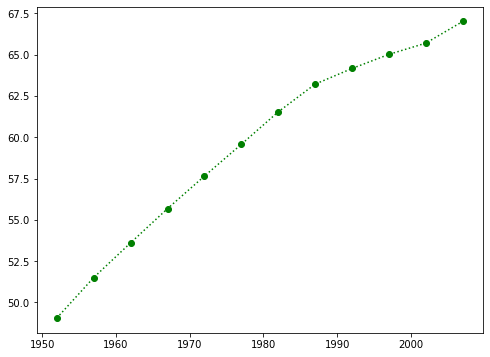

In [131]:
plt.figure(figsize=(8, 6))
# global_yearly_life.plot()
plt.plot(global_yearly_life, 'og:')
plt.show()
# https://codetorial.net/matplotlib/set_linestyle.html 참조